# 1. Import Library & Read Dataset Image

In [5]:
# Import library-library yang akan dibutuhkan pada eksperimen kali ini
import pandas as pd
import os
import matplotlib.pyplot as plt
plt.style.use("ggplot")
import numpy as np
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from PIL import Image
from sklearn.model_selection import train_test_split
import cv2
from glob import glob
from keras.optimizers import SGD, Adam
from keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.models import Sequential

## 3. Image Preprocessing

### 3.1. Data Augmentation

Augmentasi data/augmentasi gambar merupakan teknik yang sering digunakan dalam eksperimen pengklasifikasian gambar untuk meningkatkan ukuran dari kumpulan data gambar. Cara kerja secara umum proses dari augmentasi gambar adalah mengambil sampel dari kumpulan data gambar, setelah itu data sampel tersebut dimodifikasi/diubah ukurannya/pencahayannya/mengubah piksel dari gambar, dll. Selesai dari memodifikasi data maka selanjutnya data yang telah dimodifikasi akan ditambahkan ke kumpulan data aslinya sehingga dataset gambar yang dimiliki akan lebih banyak dan bervariasi.

Melakukan pemrosesan augmentasi data/augmentasi gambar dapat membantu atau bahkan menghindari permasalahan data yang kurang variasi/data yang tidak cukup, mencegah terjadinya overfitting, dan membuat algoritma dapat menghasilkan performa yang lebih baik.

Referensi:

- https://towardsdatascience.com/complete-guide-to-data-augmentation-for-computer-vision-1abe4063ad07

In [6]:
# Memanggil semua data gambar dengan keempat kategori yang berbeda yang ada di dalam folder COVID-19_Radiography_Dataset
root_dataset_dir = "COVID-19_Radiography_Dataset/"
covid19_images_data = root_dataset_dir + "COVID"
lung_opacity_images_data = root_dataset_dir + "Lung_Opacity"
normal_images_data = root_dataset_dir + "Normal"
pneumonia_images_data = root_dataset_dir + "Viral Pneumonia"

In [7]:
"""
Membuat generator untuk membagi data menjadi 2 bagian: training dan testing (validation) yang berisikan
kumpulan gambar dari sub-direktori/sub-folder dari main folder. Pada eksperimen kali ini
main foldernya adalah COVID-19_Radiography_Dataset sedangkan sub-foldernya terdiri dari keempat label/kategori
gambar yang ada di dalam folder COVID-19_Radiography_Dataset diantaranya COVID, Lung Opacity, Normal, dan Viral Pneumonia
"""
training_generator = tf.keras.preprocessing.image_dataset_from_directory(root_dataset_dir,
                                                                         image_size=(100, 100),
                                                                         subset="training",
                                                                         shuffle=True,
                                                                         label_mode="int",
                                                                         class_names=None,
                                                                         color_mode="rgb",
                                                                         validation_split=0.2,
                                                                         labels="inferred",
                                                                         seed=12,
                                                                         batch_size=16)

print()

testing_generator = tf.keras.preprocessing.image_dataset_from_directory(root_dataset_dir,
                                                                        image_size=(100, 100),
                                                                        subset="validation",
                                                                        shuffle=True,
                                                                        label_mode="int",
                                                                        class_names=None,
                                                                        color_mode="rgb",
                                                                        validation_split=0.2,
                                                                        labels="inferred",
                                                                        seed=12,
                                                                        batch_size=16)

Found 7142 files belonging to 4 classes.
Using 5714 files for training.


2022-11-04 15:27:01.008553: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-04 15:27:01.108048: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-04 15:27:01.108409: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-04 15:27:01.109222: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the approp


Found 7142 files belonging to 4 classes.
Using 1428 files for validation.


Berdasarkan dari script diatas terdapat beberapa fungsi dalam melakukan generate data gambar yang dilakukan pada eksperimen kali ini dan berikut adalah penjelasan dari fungsi-fungsi diatas:

1. image_dataset_from_directory berfungsi untuk memanggil/menghasilkan file data gambar dalam direktori folder utama yang menghasilkan kumpulan gambar dari sub-direktori atau direktori kelas yang merupakan nama sub-direktori. Untuk kasus pada eksperimen kali ini direktori folder utamanya adalah COVID-19_Radiography_Dataset dan sub-direktori/folder turunan dari folder utama adalah nama kelas/nama kategori yaitu covid-19, lung opacity, normal dan pneumonia.
2. image_size bertujuan untuk mengubah (resize) piksel gambar yang terdiri dari lebar gambar (width) dan tinggi gambar (height) yang akan digunakan pada eksperimen kali ini.
3. subset merupakan label/identitas dari gambar yang terdiri dari "training" dan "validation". Subset digunakan ketika nilai dari validation_split digunakan juga.
4. validation_split bertujuan untuk membagi jumlah data dalam proses augmentasi gambar. Pada eksperimen kali ini nilai dari validasinya adalah 0.2 atau 20%. Berarti 20% untuk memvalidasi/menguji data sedangkan 80% untuk melatih data dengan algoritma deep learning.
5. label_mode bertujuan untuk menjelaskan dari proses pengkodean dari suatu label gambar. Opsi yang digunakan pada eksperimen ini adalah int yang itu berarti label akan dikodekan sebagai bilangan bulat untuk nilai loss yaitu sparse_categorical_crossentrophy.
6. labels="inferred" merupakan label yang dihasilkan dari sub-direktori folder atau folder turunan dari folder utama atau daftar/tupel label bilangan bulat dengan ukuran yang sama dengan jumlah gambar dalam label direktori. Dalam hal ini sub-direktorinya adalah covid-19, lung opacity, normal, dan pneumonia.
7. shuffle bertujuan untuk mengacak data gambar yang ada di dalam sub-direktori pada masing-masing kelas gambar.
8. batch_size merupakan ukuran dari kumpulan data gambar yang ada di dalam direktori.
9. class_names merupakan parameter yang berfungsi untuk mengontrol urutan kategori/kelas secara eksplisit dan harus cocok dengan penamaan yang ada di sub-direktori folder.

Referensi:

- https://www.tensorflow.org/api_docs/python/tf/keras/utils/image_dataset_from_directory

In [8]:
# Melihat nama-nama dari kelas yang digunakan dalam pengujian kali ini, baik dari training generator dan testing generator
class_images_train = training_generator.class_names
print(class_images_train)

class_images_test = testing_generator.class_names
print(class_images_test)

['COVID', 'Lung_Opacity', 'Normal', 'Viral Pneumonia']
['COVID', 'Lung_Opacity', 'Normal', 'Viral Pneumonia']


Berdasarkan hasil output diatas telah diketahui bahwa dalam pengujian kali ini kita akan mengklasifikasikan gambar berdasarkan label kelas/label kategori seperti apakah gambar tersebut teridentifikasi sebagai kategori covid 19/lung opacity/pneumonia/normal. Sesuai dengan permasalahan tersebut, hasil output diatas saya telah berhasil mengidentifikasi data gambar berdasarkan keempat kelas dan juga masing-masing telah dipisahkan dengan identitas variabel yaitu training dan validasi.

Variabel training memiliki jumlah data sebanyak 5.000 data gambar yang akan digunakan untuk melatih algoritma dengan data yang tersedia sedangkan variabel validasi menggunakan jumlah data sebanyak 2.142 data gambar yang bertujuan untuk mengujikan algoritma yang telah mempelajari data-data selama proses training dengan menggunakan data baru (dalam hal ini 2.142 data gambar merupakan data baru).

# Prediksi

### 4.1. ResNet 152 v1 Algorithm

In [9]:
"""
Membuat jaringan syaraf tiruan (neural networks) dengan menggunakan algoritma ResNet 152 versi 1
dari keras serta menampilkan hasil dari proses pembuatan jaringan syaraf tiruan berdasarkan algoritma ResNet 152
"""

ResNet_algorithm_152v1 = Sequential()

# Memanggil algoritma ResNet 152 versi 1 dengan beberapa hyperparameter dari algoritma ResNet 152 versi 1
ResNet152_v1_network = tf.keras.applications.ResNet152(
    input_shape=(100, 100, 3),
    include_top=False,
    pooling="avg",
    weights="imagenet",
    classes=4,
    classifier_activation="softmax",
)

"""
Hyperparameter yang saya gunakan dalam algoritma ResNet 152 versi 1 yang terdiri dari 6 parameter yang berbeda
yaitu input_shape, include_top, pooling, weights, classes, dan classifier_activation.
1. input_shape berfungsi untuk dijadikan ukuran dari gambar yang akan dilatih oleh algoritma ResNet 152.
2. include_top bertujuan untuk menyertakan layer yang terhubung penuh di bagian atas layer yang dibuat.
3. pooling="avg" merupakan ekstraksi fitur/gambar menyatukan nilai rata-rata dan akan diterapkan pada
output dari blok konvolusi terakhir sehingga output dari algoritma akan menjadi tensor 2D.
4. weights="imagenet" bertujuan untuk menjadikan pre-training di ImageNet.
5. classes merupakan jumlah kelas/kategori pada dataset gambar yang bertujuan untuk mengklasifikasikan gambar
6. Terakhir adalah parameter classifier_activation yang merupakan fungsi aktivasi untuk digunakan pada top layer
dari layer yang digunakan. Parameter ini dapat diisi oleh 2 nilai yaitu None dan softmax

Referensi: https://keras.io/api/applications/resnet/#resnet152-function
"""

# Layer yang berisikan model ResNet 152 v1 yang didalamnya telah terdapat 6 parameter beserta nilai-nilainya
ResNet_algorithm_152v1.add(ResNet152_v1_network)

"""
Layer untuk mencegah terjadinya overfitting (BatchNormalization) dan melakukan
tahap mengubah matriks di pooling layer menjadi vektor tunggal (Flatten)
"""
ResNet_algorithm_152v1.add(Flatten())
ResNet_algorithm_152v1.add(keras.layers.BatchNormalization())

ResNet_algorithm_152v1.add(keras.layers.Dense(185, activation="relu"))

ResNet_algorithm_152v1.add(keras.layers.Dense(150, activation="relu"))
ResNet_algorithm_152v1.add(keras.layers.Dropout(0.4))

ResNet_algorithm_152v1.add(keras.layers.BatchNormalization())
ResNet_algorithm_152v1.add(keras.layers.Dropout(0.3))

ResNet_algorithm_152v1.add(keras.layers.Dense(120))
ResNet_algorithm_152v1.add(keras.layers.Dropout(0.3))

ResNet_algorithm_152v1.add(keras.layers.Dense(73, activation="relu"))

ResNet_algorithm_152v1.add(keras.layers.Dense(40, activation="relu"))

ResNet_algorithm_152v1.add(keras.layers.Dense(4, activation="softmax"))

"""
Menginisialisasikan fungsi optimasi dan learning rate yang akan digunakandi dalam
neural networks dan optimasi yang akan digunakan dalam pengujian kali ini adalah Adam
"""
optimizer = SGD(learning_rate=0.01)
 
# Menyusun jaringan yang telah dibuat berdasarkan optimizer yang digunakan
ResNet_algorithm_152v1.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Melihat susunan jaringan syaraf tiruan berdasarkan algoritma ResNet 152 v1
ResNet_algorithm_152v1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet152 (Functional)      (None, 2048)              58370944  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 batch_normalization (BatchN  (None, 2048)             8192      
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 185)               379065    
                                                                 
 dense_1 (Dense)             (None, 150)               27900     
                                                                 
 dropout (Dropout)           (None, 150)               0         
                                                        

Dalam menyusun jaringan syaraf tiruan dengan model ResNet (Residual Network) 152 v1, saya menggunakan beberapa layer didalamnya. Layer pertama tentu saja layer dari model ResNet 152 v1 yang dimuat di dalam variabel "ResNet152_v1_network". Pada variabel tersebut berisikan 6 parameter dari model ResNet 152 v1 yang saya panggil dari library keras. Setelah menginisialisasi parameter-parameter dari model ResNet 152 v1, selannjutnya saya jadikan variabel tersebut di layer pertama pada eksperimen ini.

Selanjutnya saya menambahkan proses flattening dan batch normalization yang kedua proses tersebut memiliki tugasnya masing-masing. Proses flatten berfungsi untuk mengubah nilai-nilai matriks menjadi sebuah vektor tunggal saja. Penggambarannya seperti ini. Sebuah gambar pasti memiliki kumpulan nilai-nilai matriks yang menyusun gambar tersebut bukan? Nah, dengan menggunakan flatten maka kumpulan nilai-nilai yang berada di dalam matriks data gambar tersebut akan dijadikan satu kolom saja atau sebuah vektor tunggal yang nantinya vektor tunggal ini (yang didalamnya telah terdapat kumpulan nilai dari matriks gambar) akan menjadi bagian dari layer input dari model yang akan digunakan (dalam kasus ini akan dijadikan sebagai layer input ResNet 152 v1). Sedangkan tahap batch normalization berfungsi untuk memproses jaringan syaraf yang telah dibuat menjadi lebih stabil dengan menambahkan ekstra layer di jaringan syaraf untuk menghindari terjadinya over-fitting terhadap hasil performa.

Referensi dari tahap flatten dan batch normalization:

- https://www.megabagus.id/deep-learning-convolutional-neural-networks/6/

- https://www.analyticsvidhya.com/blog/2021/03/introduction-to-batch-normalization/

Selain batch normalization dan flatten, script diatas terdapat 2 nilai dari activation function. Activation function berfungsi untuk mendefinisikan nilai output dari layer input. Activation function dapat memutuskan untuk mengaktifkan/menonaktifkan neuron yang ada di layer input agar mendapatkan hasil (output) yang diinginkan dengan memperhitungkan jumlah nilai bobot dalam setiap neuron dan menambahkan bias. Jadi activation function tidak hanya dilakukan oleh model lienar tetapi juga dapat dilakukan/dimasukkan nilai yang non-linear ke dalam output pada setiap neuron.
Activation function yang saya gunakan pada eksperimen kali ini ada 2 yaitu ReLu dan Softmax. Fungsi aktivasi relu merupakan fungsi aktivasi yang sangat sering digunakan yang memiliki range dari 0 - tak terhingga (infinity values). Bahkan jika terdapat nilai negatif maka ReLu akan mengubah/mentransformasikan semua nilai negatif menjadi nol. Lalu fungsi aktivasi softmax merupakan fungsi aktivasi yang sangat sering digunakan pada lapisan terakhir (output layer) untuk pengambilan keputusan dengan memberikan nilai pada input sesuai dengan bobotnya dan jumlah bobot ini akhirnya menjadi satu.

Referensi dari penjelasan activation function, ReLu, dan Softmax:

- https://www.analyticssteps.com/blogs/7-types-activation-functions-neural-network

- https://www.geeksforgeeks.org/activation-functions-neural-networks/

In [ ]:
"""
Mulai melatih algoritma ResNet 152 versi 1 dalam 30 kali proses pengulangan dengan menggunakan
generator dari proses training dan memvalidasi/memprediksi menggunakan generator testing
"""
history = ResNet_algorithm_152v1.fit(training_generator, validation_data=testing_generator, epochs=30, batch_size=16)

Dari hasil epochs diatas dapat diketahui nilai-nilai metrics dari hasil masing-masing epoch yang digunakan yaitu nilai loss, validation loss, accuracy, dan validation accuracy. Nilai loss merupakan nilai dari hasil perhitungan loss function dari data training setelah melakukan proses pelatihan model deep learning (dalam kasus ini pelatihan data dengan model ResNet 152 v1). Nilai loss terendah terjadi pada epoch ke-26 dengan nilai loss 0.0073 yang menjadikan nilai loss tersebut paling rendah diantaranya nilai-nilai loss pada setiap epochs. Selanjutnya nilai validation_loss yang merupakan nilai dari hasil perhitungan validation data (data validasi) atau bisa juga disebut sebagai data testing. Validation loss juga dapat diindikasikan sebagai hasil prediksi menggunakan data terbaru, data yang tidak dilatih oleh model ResNet 152 v1. Nilai validation loss terendah adalah 0.2988 yang terjadi pada epoch ke-13.

Lalu accuracy yang merupakan hasil dari perhitungan akurasi terhadap data training setelah model ResNet 152 v1 dilatih dengan data. Nilai accuracy tertinggi yang didapatkan oleh model ResNet 152 v1 adalah 0.9986 yang terjadi pada epoch ke-26. Terakhir adalah validation_accuracy yang merupakan hasi dari perhitungan metrik akurasi terhadap data testing yang dimana data ini merupakan data yang tidak dilatih oleh model deep learning (ResNet 152 v1). Nilai validation_accuracy tertinggi adalah 0.9244 yang terjadi pada epoch ke-27.

Referensi:

- https://kotakode.com/pertanyaan/828/Penjelasan-loss%2C-accuracy%2C-val_loss%2C-val_accuracy

- https://datascience.stackexchange.com/questions/25267/keras-difference-beetween-val-loss-and-loss-during-training

In [ ]:
""" MODEL_BASE_PATH = "Model"
PROJECT_NAME = "Resnet152_v1"
SAVE_MODEL_NAME = "resnet152_v1.h5"
save_model_path = os.path.join(MODEL_BASE_PATH, PROJECT_NAME, SAVE_MODEL_NAME)

if os.path.exists(os.path.join(MODEL_BASE_PATH, PROJECT_NAME)) == False:
    os.makedirs(os.path.join(MODEL_BASE_PATH, PROJECT_NAME))
    
print('Saving Model At {}...'.format(save_model_path))
ResNet_algorithm_152v1.save(save_model_path,include_optimizer=False) """

' MODEL_BASE_PATH = "Model"\nPROJECT_NAME = "Resnet152_v1"\nSAVE_MODEL_NAME = "resnet152_v1.h5"\nsave_model_path = os.path.join(MODEL_BASE_PATH, PROJECT_NAME, SAVE_MODEL_NAME)\n\nif os.path.exists(os.path.join(MODEL_BASE_PATH, PROJECT_NAME)) == False:\n    os.makedirs(os.path.join(MODEL_BASE_PATH, PROJECT_NAME))\n    \nprint(\'Saving Model At {}...\'.format(save_model_path))\nResNet_algorithm_152v1.save(save_model_path,include_optimizer=False) '

## Load Exported Model

In [13]:
MODEL_PATH = "Model/Resnet152_v1/resnet152_v1.h5"
modelv1 = tf.keras.models.load_model(MODEL_PATH, compile=False)

In [14]:
optimizer = SGD(learning_rate=0.01)
 
# Menyusun jaringan yang telah dibuat berdasarkan optimizer yang digunakan
modelv1.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [ ]:
loaded_accuracy = modelv1.evaluate(testing_generator)

In [50]:
pred_probs12 = modelv1.predict(testing_generator, verbose=1)

90/90 [==============================] - 6s 69ms/step


### CM1

In [22]:
true_categories = tf.concat([y for x, y in testing_generator], axis=0)

In [23]:
predicted_id = np.argmax(pred_probs, axis = 1)

In [33]:
true_categories_rd = np.argmax(true_categories, axis = 1)

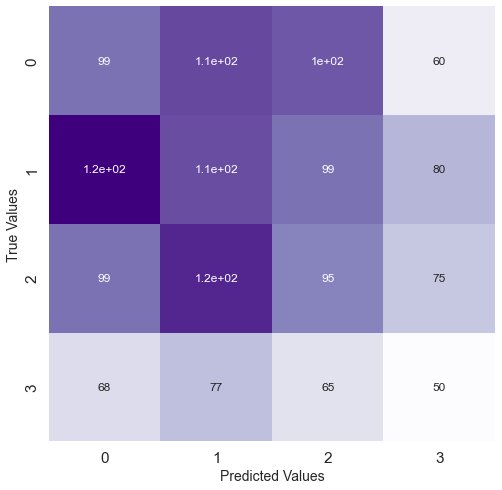

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(true_categories_rd, predicted_id)
cm
fig = plt.figure(figsize = (8,8))
ax1 = fig.add_subplot(1,1,1)
sns.set(font_scale=1.4) #for label size
sns.heatmap(cm, annot=True, annot_kws={"size": 12},
     cbar = False, cmap='Purples');
ax1.set_ylabel('True Values',fontsize=14)
ax1.set_xlabel('Predicted Values',fontsize=14)
plt.show()

In [51]:
cm

array([[ 99, 108, 105,  60],
       [125, 107,  99,  80],
       [ 99, 116,  95,  75],
       [ 68,  77,  65,  50]])

In [45]:
from sklearn.metrics import classification_report
print(classification_report(true_categories_rd, predicted_id))

              precision    recall  f1-score   support

           0       0.25      0.27      0.26       372
           1       0.26      0.26      0.26       411
           2       0.26      0.25      0.25       385
           3       0.19      0.19      0.19       260

    accuracy                           0.25      1428
   macro avg       0.24      0.24      0.24      1428
weighted avg       0.25      0.25      0.25      1428

